In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("BlackFriday.csv")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.shape

(537577, 12)

In [5]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [7]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

## Two ways to handle this much Nan values:
##      - Delete all rows using dropna which will shrink the data to almost 1/4


In [8]:
df.dropna()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
13,1000005,P00145042,M,26-35,20,A,1,1,1,2.0,5.0,15665
14,1000006,P00231342,F,51-55,9,A,1,0,5,8.0,14.0,5378
16,1000006,P0096642,F,51-55,9,A,1,0,2,3.0,4.0,13055
...,...,...,...,...,...,...,...,...,...,...,...,...
537549,1004734,P00345842,M,51-55,1,B,1,1,2,8.0,14.0,13082
537551,1004735,P00313442,M,46-50,3,C,3,0,5,6.0,8.0,6863
537562,1004736,P00146742,M,18-25,20,A,1,1,1,13.0,14.0,11508
537571,1004737,P00221442,M,36-45,16,C,1,0,1,2.0,5.0,11852


In [9]:
df.dropna().shape

(164278, 12)

In [10]:
size_drop = (df.shape[0] - df.dropna().shape[0])/df.shape[0]
print("The Dataset lost around",size_drop*100,"% of its data")

The Dataset lost around 69.44102891306734 % of its data


##      - Or delete those particular columns and work on the rest

In [11]:
del df["Product_Category_2"]
del df["Product_Category_3"]

df.shape

(537577, 10)

# Analysing Columns

In [12]:
df["User_ID"].nunique()

5891

In [13]:
df["Product_ID"].nunique()

3623

In [14]:
df["Gender"].unique()

array(['F', 'M'], dtype=object)

In [15]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [16]:
df["Occupation"].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [17]:
df["City_Category"].unique()

array(['A', 'C', 'B'], dtype=object)

In [18]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [19]:
df["Marital_Status"].unique()

array([0, 1], dtype=int64)

In [20]:
df["Product_Category_1"].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9], dtype=int64)

In [21]:
df["Purchase"].sum()/len(df["Purchase"])

9333.859852635065

In [22]:
for column in df.columns:
    print(column,":",df[column].nunique())

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Purchase : 17959


# Analysis Gender

### Ratio of each Gender in Dataset 

In [23]:
len(df[df["Gender"]=='M']) , len(df[df["Gender"]=='F'])

(405380, 132197)

## Visualizing it by different ways:
## 1

In [24]:
data = pd.DataFrame({'Ratio':[len(df[df["Gender"]=='M']) , len(df[df["Gender"]=='F'])]},index = ["Male","Female"])

In [25]:
data

,Ratio
Male,405380
Female,132197


<Axes: ylabel='Ratio'>

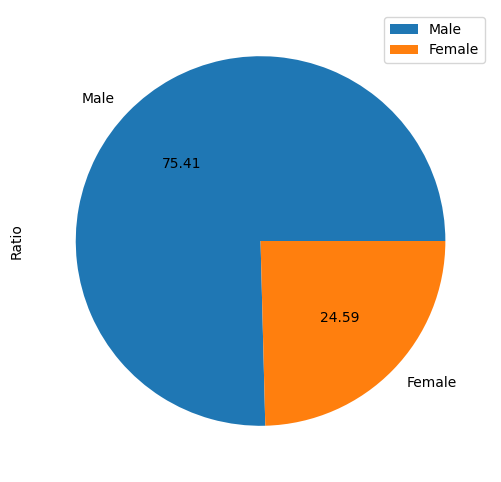

In [26]:
#data["Ratio"].plot(kind = "pie",autopct = "%.2f")
data.plot.pie(y = 'Ratio', figsize = (6,6), autopct = "%.2f")

## 2

<Axes: title={'center': 'Gender Ratio'}>

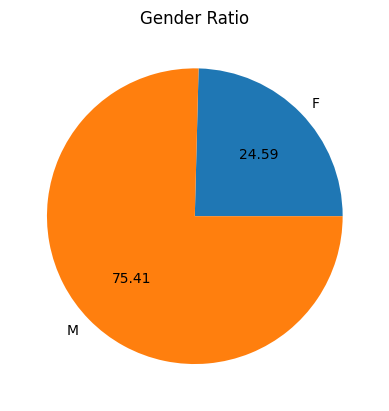

In [27]:
df.groupby("Gender").size().plot(kind = "pie",autopct = "%.2f",title='Gender Ratio')

<Axes: xlabel='Gender'>

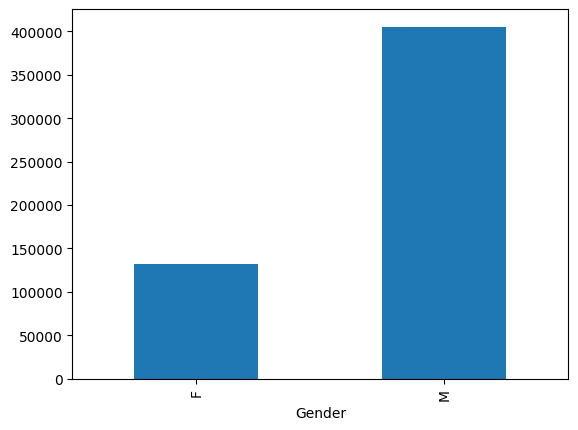

In [28]:
df.groupby("Gender").size().plot(kind="bar")

### How much Purchase was done by each Gender (Spent Money)

In [29]:
#df.groupby("Gender").sum()['Purchase'] -> The reason this was not working because it was taking .sum() with non numerical columns too

In [30]:
df.groupby('Gender')['Purchase'].sum()
#df.groupby('Gender').sum(numeric_only=True)['Purchase']

Gender
F    1164624021
M    3853044357
Name: Purchase, dtype: int64

<Axes: ylabel='Purchase'>

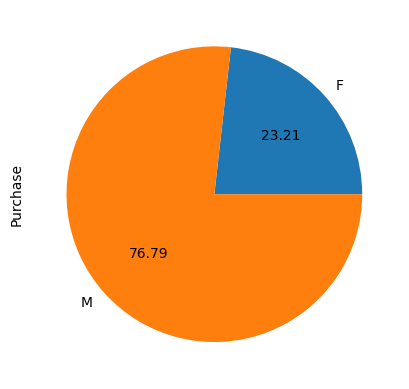

In [31]:
df.groupby('Gender')['Purchase'].sum().plot(kind="pie",autopct = "%.2f")

## What is the average spending of each gender?

<Axes: ylabel='Purchase'>

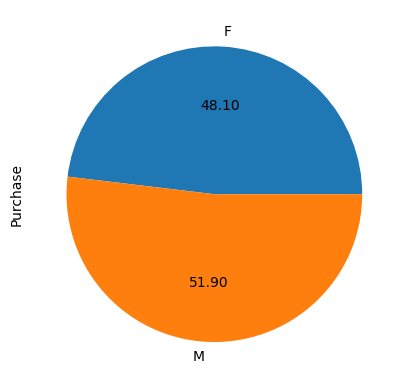

In [32]:
df.groupby('Gender')['Purchase'].mean().plot(kind="pie",autopct="%.2f")

# Analysing Age & Marital Status

<Axes: title={'center': 'Distribution by Age'}, xlabel='Age'>

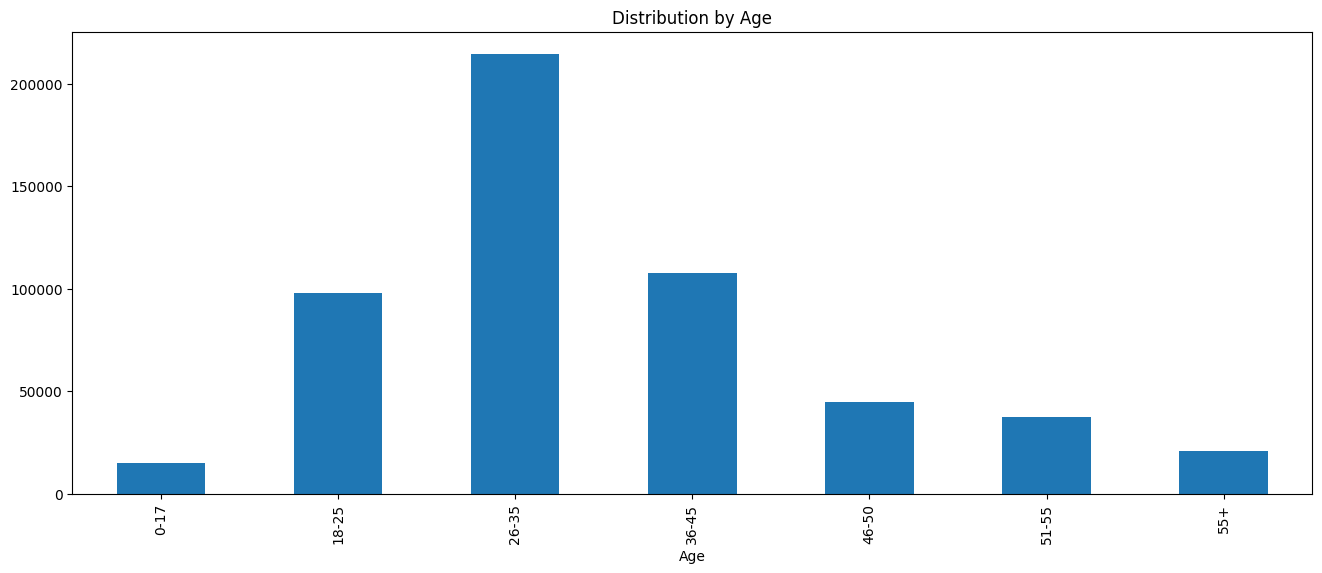

In [33]:
df.groupby('Age').size().plot(kind="bar",figsize=(16,6),title="Distribution by Age")

In [34]:
df.groupby('Age').size()

Age
0-17      14707
18-25     97634
26-35    214690
36-45    107499
46-50     44526
51-55     37618
55+       20903
dtype: int64

## Unique Products from there particular age group

### One Way - Brute approach

In [35]:
# Particular Age group k counts
for i in df['Age'].unique():
    print(i,",",len(df[df['Age']==i]))

0-17 , 14707
55+ , 20903
26-35 , 214690
46-50 , 44526
51-55 , 37618
36-45 , 107499
18-25 , 97634


In [36]:
# Last value of i from above
i

'18-25'

In [37]:
# For that particular 18-25 we have total 97634 ids
#df[df['Age']==i]['Product_ID']

# Now comes how many unique values are there.
df[df['Age']==i]['Product_ID'].nunique()

3213

In [38]:
# Unique Products from there Age Group
for i in df['Age'].unique():
    print(i,",",df[df['Age']==i]['Product_ID'].nunique())

0-17 , 2300
55+ , 2573
26-35 , 3419
46-50 , 3099
51-55 , 2877
36-45 , 3318
18-25 , 3213


In [39]:
# Convert it into a DataFrame
lst=[]
for i in df['Age'].unique():
    lst.append([i,df[df['Age']==i]['Product_ID'].nunique()])
data = pd.DataFrame(lst,columns=['Age','Unique_Products'])
data

,Age,Unique_Products
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


### Faster Approach

In [40]:
data2 = df.groupby('Age')['Product_ID'].nunique().reset_index()
data2.rename(columns={'Product_ID':'Unique_Products'},inplace=True)
data2
#data = df.groupby('Age')['Product_ID'].nunique().rename('Unique_Products').reset_index() -> oneline

,Age,Unique_Products
0,0-17,2300
1,18-25,3213
2,26-35,3419
3,36-45,3318
4,46-50,3099
5,51-55,2877
6,55+,2573


<Axes: title={'center': 'Unique Products by each Age Group'}, xlabel='Age', ylabel='Unique_Products'>

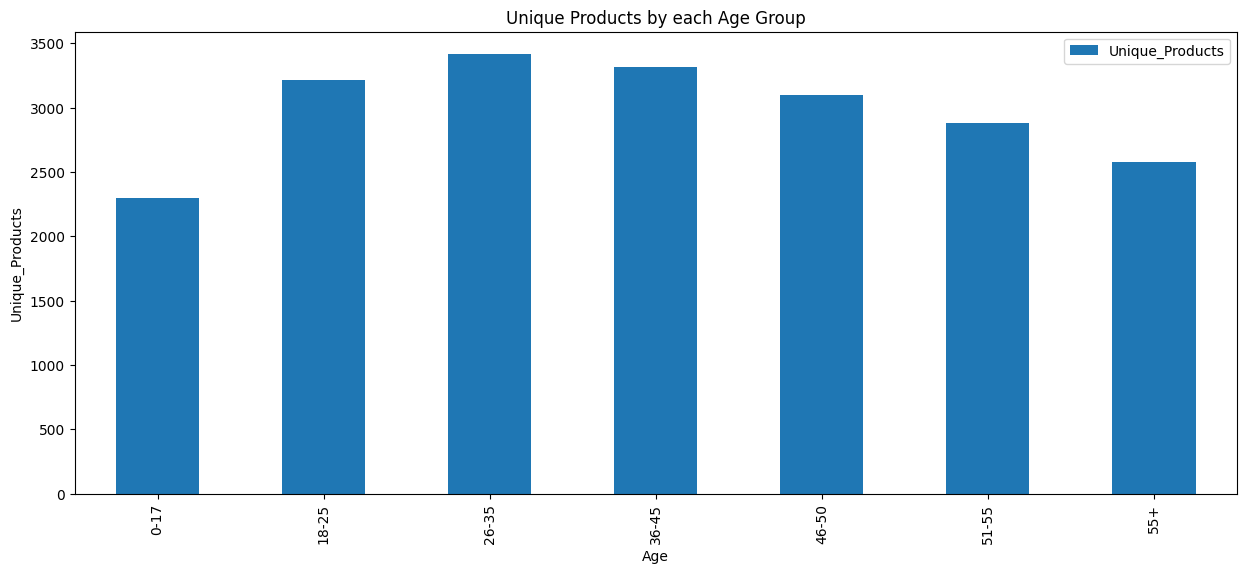

In [41]:
data2.plot(kind="bar",x='Age',figsize=(15,6),xlabel = 'Age',ylabel='Unique_Products',title="Unique Products by each Age Group")

## Calculates the sum of Purchase for each age group

<Axes: title={'center': 'Sum of Purachse by each Age Group'}, xlabel='Age'>

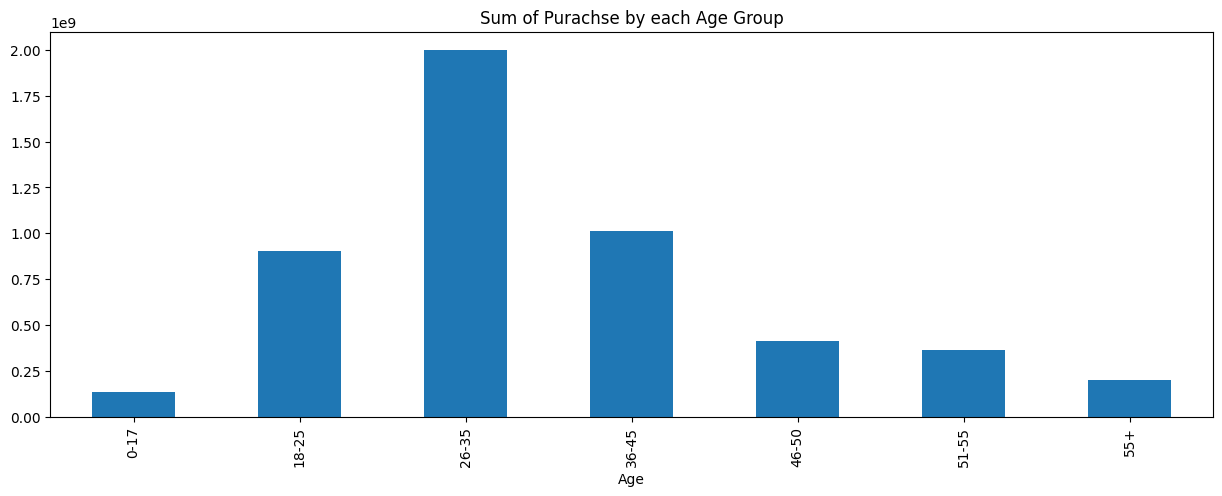

In [42]:
df.groupby('Age')['Purchase'].sum().plot(kind="bar",x="Age",figsize=(15,5),title = "Sum of Purachse by each Age Group")

## Calculate the avergae amount spent by each age group

<Axes: title={'center': 'Avergae Amount spent by Each Age Group'}, xlabel='Age'>

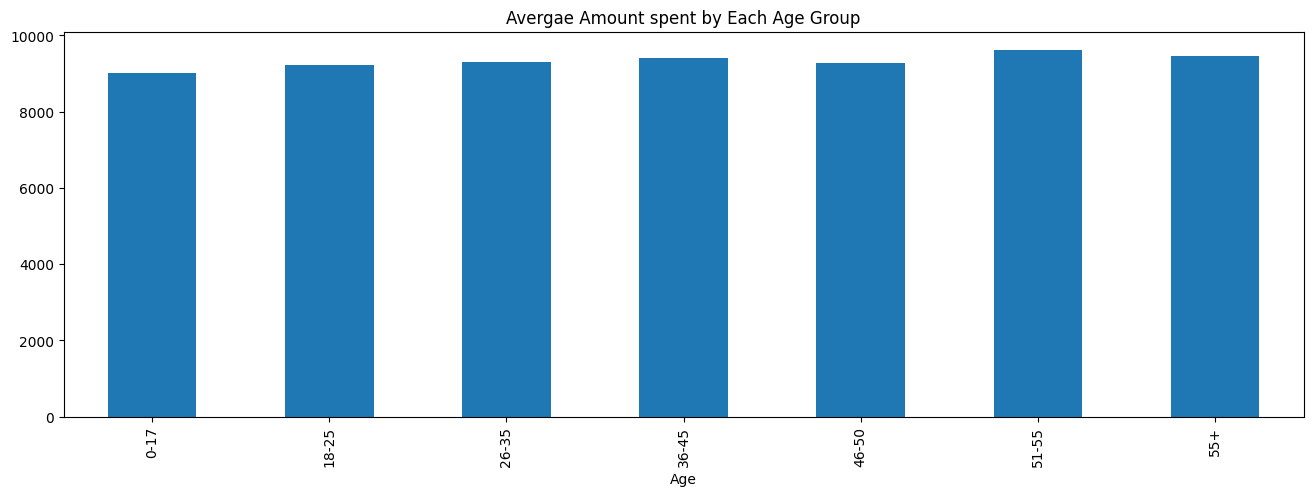

In [43]:
df.groupby('Age')['Purchase'].mean().plot(kind = "bar",x='Age',figsize=(16,5),title="Avergae Amount spent by Each Age Group")

<Axes: ylabel='Purchase'>

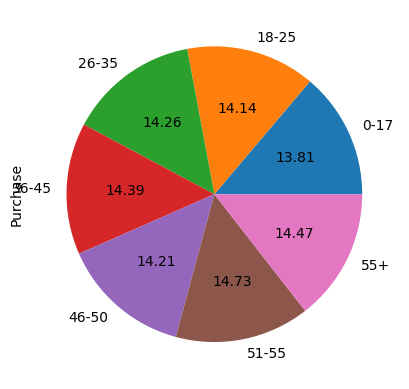

In [44]:
df.groupby('Age')['Purchase'].mean().plot.pie(autopct = "%.2f")

# Marital Status

<Axes: >

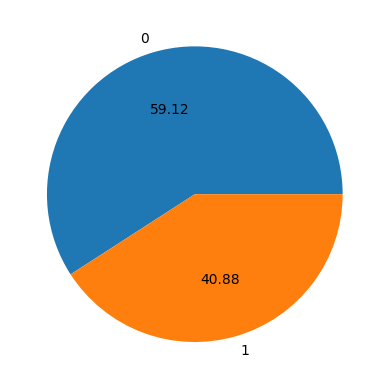

In [46]:
df.groupby('Marital_Status').size().plot.pie(autopct = "%.2f")

## Calculate the sum of purchase in different marital status

In [47]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


<Axes: xlabel='Marital_Status'>

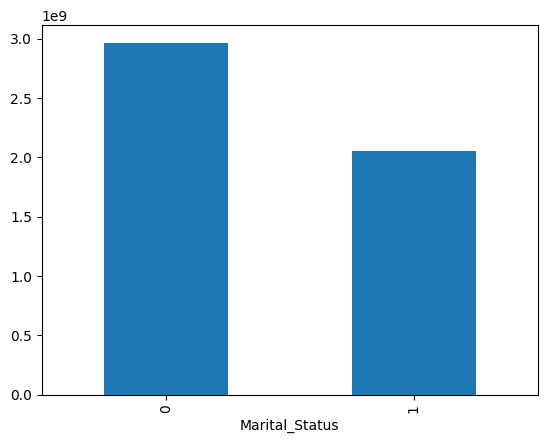

In [49]:
df.groupby("Marital_Status")["Purchase"].sum().plot(kind="bar")